<a href="https://colab.research.google.com/github/sanmeshh/Synapse_LP/blob/week4/Copy_of_Synapse_LP_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
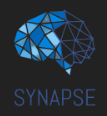

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult_income_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dealing with Nan values

In [ ]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na
# df.isna().sum()
df.dropna(inplace=True)

## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [ ]:
#Write your code here
df.groupby('relationship')['fnlwgt'].mean()




,fnlwgt
relationship,
Husband,186819.673754
Not-in-family,191680.809345
Other-relative,206017.299213
Own-child,193500.518361
Unmarried,190790.042030
Wife,181480.642248


In [ ]:
(df.groupby('relationship')['fnlwgt'].max())

,fnlwgt
relationship,
Husband,1226583
Not-in-family,1455435
Other-relative,709445
Own-child,1268339
Unmarried,1484705
Wife,953588


In [ ]:
(df.groupby('sex')['fnlwgt'].max())

,fnlwgt
sex,
Female,1484705
Male,1455435


In [ ]:
(df.groupby('sex')['fnlwgt'].mean())

,fnlwgt
sex,
Female,185926.150480
Male,191650.246075


In [ ]:
(df.groupby('race')['fnlwgt'].mean())

,fnlwgt
race,
Amer-Indian-Eskimo,123491.944056
Asian-Pac-Islander,159337.400000
Black,228807.455449
Other,195772.238095
White,187285.002159


In [ ]:
df.groupby('race')['fnlwgt'].max()

,fnlwgt
race,
Amer-Indian-Eskimo,395170
Asian-Pac-Islander,506329
Black,1268339
Other,481175
White,1484705


## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [ ]:
#write your code here
df.drop(columns=['education-num'],inplace=True)


## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

In [ ]:
#Write your code here
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

df['race']=label.fit_transform(df['race'])
df['sex']=label.fit_transform(df['sex'])


df=pd.get_dummies(df,columns=['marital-status','workclass','education','occupation','relationship','native-country'],dtype='int')




In [ ]:
df

,age,fnlwgt,race,sex,capital-gain,capital-loss,hours-per-week,income,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,4,1,2174,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,4,1,0,0,13,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,4,1,0,0,40,<=50K,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,2,1,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,2,0,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,4,0,0,0,38,<=50K,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,4,1,0,0,40,>50K,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [ ]:
#write your code here
df['income']=df['income'].apply(lambda x: 0 if x=='<=50K' else 1)

**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [ ]:
#write your code here
y=df['income']
df.drop(columns=['income'],inplace=True)
X=df.iloc[:,:]
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

In Logistic regression features are taken as input and the probabilties of those features being of a particular class are given. It uses sigmoid function which converts a X value to a value between 0 to 1.A thereshold is set for example 0.5 below 0.5 the algorithm predicts as 0 and above that predicts as 1.
First it works like linear regression where it calculates z=w.X+b with the help of the independent features X an dependent features Y. And puts that function z in the the sigmoid function/ logistic function.

Use Cases: email spam detection: The algorithm is feeded data such as the body of an email or the name of the sender and on basis of that it predicts whether the email is a spam or not.

Breast Cancer Detection:Also used for medicinal purposes where the size of the tumour and various other features are given to predict whether the tumor is malignant or not.

In [ ]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Find the accuracy and confusion matrix for the same and explain what it shows.

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
logacc=accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



0.7860537075919991
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6767
           1       0.72      0.25      0.37      2282

    accuracy                           0.79      9049
   macro avg       0.76      0.61      0.62      9049
weighted avg       0.77      0.79      0.74      9049



There are four pre-requisite definitions for the confusion matrix.

1. True positive(TP): y=1,y^=1

2. True Negative(TN): y=0,y^=0

3. False positive(FP): y=0, y^=1

4. False Negative(FN): y=1, y^=0

Accruacy:

 (TP+FN)/TP+TN+FP+FN

It is used to confirm the right predictions.

Precision:

 (TP)/(TP+FP)

It is used to check the positive right predictions.

Recall:

 TP/(TP+FN)

Also called as sensitivity, is used to identify all the positive right predictions.

F1 Score:

2*(precision * recall)/precsion+recall

F1 Score is directly proportional to the performance of the model.

Support:

Number of Samples of each clas in the dataset



# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

Since our data is discrete and not in the form of boolean or continuous we have used MultiNomial.

In [ ]:
#import the model from sklearn and apply it to your data
from sklearn.naive_bayes import MultinomialNB,GaussianNB

bayes=MultinomialNB()
bayes.fit(X_train,y_train)

y_pred=bayes.predict(X_test)

naivebayesacc=accuracy_score(y_test,y_pred)

print(accuracy_score(y_test,y_pred))




0.7717979887280363


1.Why is it called Naive?

It assumes that all features and independent.IRL there is rarely any feature independent.

It uses the concept of conditional probability which uses the outcome of previous events.

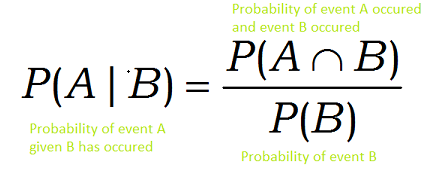

Bayes Rule for ML:

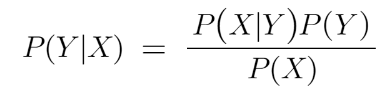

here Y is the class variable and X is the feature vector.

Modification of above formulas for Naive-Bayes-Classifier:

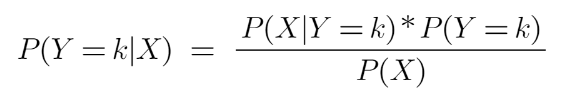

For n number of X, the formula becomes Naive Bayes:

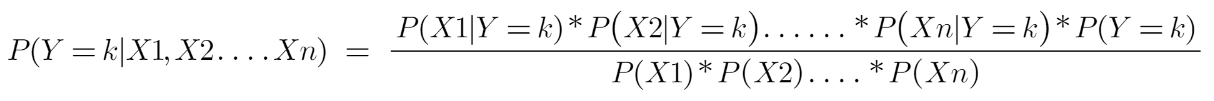

the numerator is simplified as

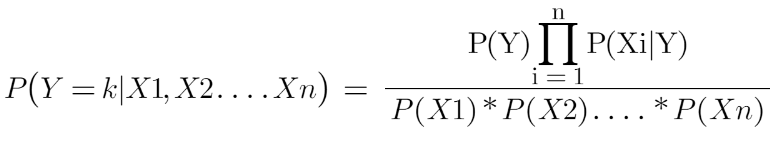

here k is represents the class usually (Y/N for binary classification)


Suppose we have this dataset:

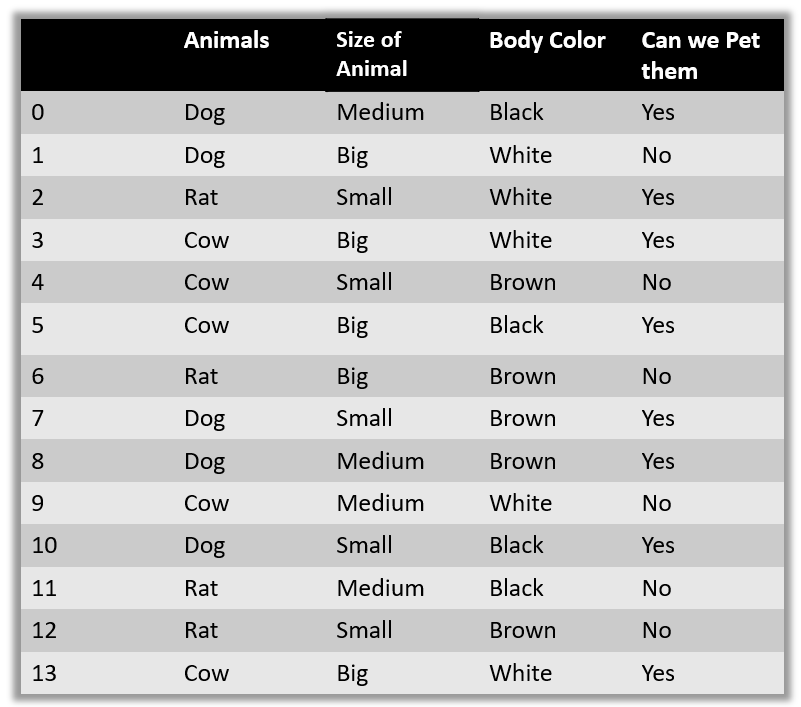

We will calculate probabilties of all samples of a feature for example for the feature animal we'll calculate the probability if we can pet them or not (Y/N) for the samples dog,cow,rat.Also we'll calculate the probabilites of Yes and No(as a whole) in our dataset.

after this we'll apply the fomula,suppose test = (Cow, Medium, Black)

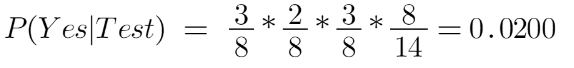

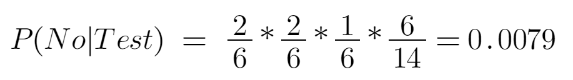

as the sum of p(yes) and p(no) is not equal to 1 we will  normalize them.And if P(yes) is greater than P(no) then yes we can pet them otherwise vice versa.

Refer: https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/



# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [ ]:
#import the decision tree from sklearn and run it on your data
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=10)

tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)

dtacc=accuracy_score(y_pred,y_test)





<b>Print the Model Accuracy</b>

In [ ]:
print(accuracy_score(y_pred,y_test))

0.8175489004309868


## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans:All the three are a type of supervised learning . But the way they work  and the concepts they use are different.

Logistic Regression: This technique uses sigmoid function (gives output between 0 to 1) and on the basis of the output of this function it predicts output.

Naive Bayes: This technique divides all the features according to their truth label,computes the probability of all the features individually and then predicts the output on the basis of probabilities computed by using the bayes theorem.In which conditional probability is used.


Decision Tree: The base of this concept is similar to nested if else condition. But it does involve lot of details in it to reach to particular output.It uses also the concept of purity for example Gini Impurity and Decision tree algorithms include ID3, C4.5, CART, and Random Forest.

Due to all the differences in these techniques the accuracies  are also different.And the data is fitted in the algorithm in different and also the method to reach to an output is unique therefore the accuracies are different.

### Mention some real life use cases for each of these three models:

Ans:

Logistic Regression:Spam detection,Tumor detection

Naive Bayes:Sentiment analysis,also Spam detection

Decision Trees:Fitness Prediction,Customer Purchases,Also sentiment analysis

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
training=[]
test=[]
for depth in range(1,11):
  dt_model=DecisionTreeClassifier(max_depth=depth,random_state=10,criterion='gini')
  dt_model.fit(X_train,y_train)
  training.append(dt_model.score(X_train,y_train))#imp
  test.append(dt_model.score(X_test,y_test))






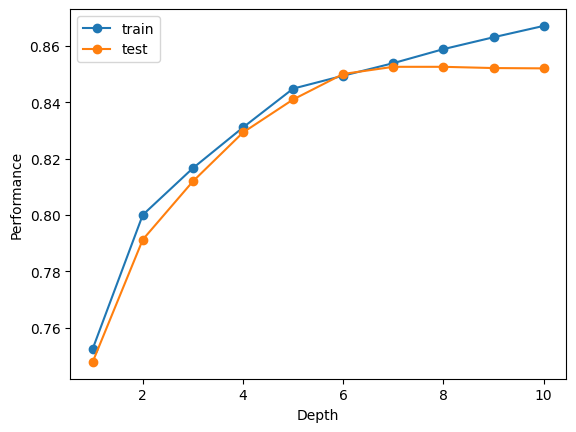

In [ ]:
df=pd.DataFrame({'depth':range(1,11), 'train_accuracy':training, 'test_accuracy':test})

plt.plot(df['depth'],df['train_accuracy'],marker='o')
plt.plot(df['depth'],df['test_accuracy'],marker='o')
plt.xlabel('Depth')
plt.ylabel('Performance')
plt.legend(['train','test'])
plt.show()

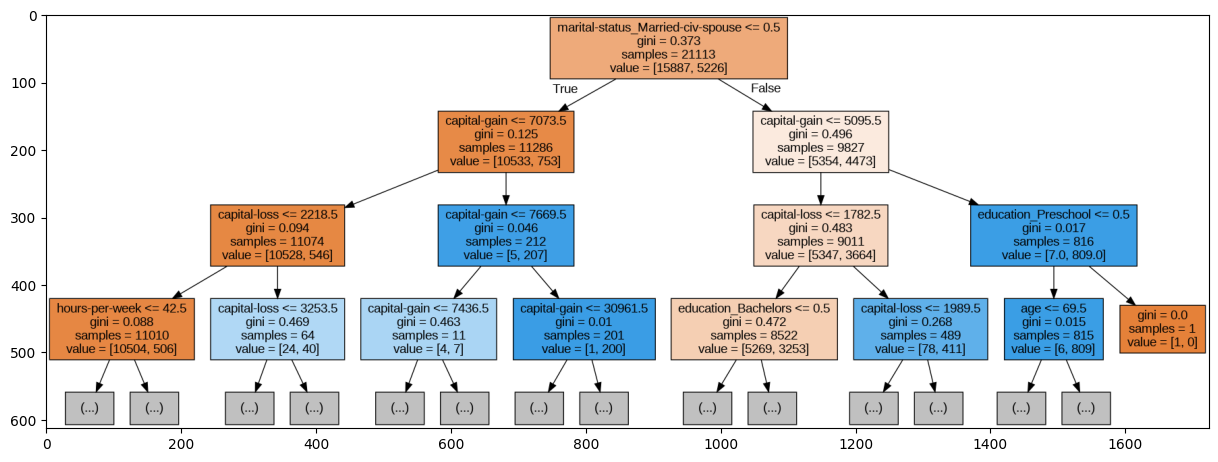

In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=3, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here
print(max(training))
print(max(test))
hyperdt=max(test)





0.8670961019277222
0.8525803956238258


### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans:
"Hyperparameters are defined as the parameters that are explicitly defined by the user to control the learning process."
The parameters I changed was depth of the decision tree , this improved the accuracy of the model as more and more classifications were made leading to better results.Also tried the parameter 'criterion' for gini,entropy,log_loss.Gini had the better result (point mein difference tha but better).

1. First graph was an easy graph where the plot is about depth vs accuracy which included two accuracies , training accuracy and test accuracy which showed how the model performed on the training data and the test data when the depth was increasing.

2. Second graph was the visualization of a decision tree.where the depth of the tree was set , helped me to gain insight on how the tree is actually working.It also shows factors like gini impurity,Number of samples and the number of true and false values(value=[]).

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#implement Random forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

RF.fit(X_train,y_train)

# param_grid={'n-estimators'}

#starts from 10 to 80 includes 10 numbers(num) of the range


param_grid={'n_estimators':[int(x) for x in np.linspace(start=10,stop=80,num=10)],
            'max_features':['auto','log2'],
            'max_depth':[2,10],
            'min_samples_split':[2,5],
            'min_samples_leaf':[1,2],
            'bootstrap':[True,False]}


from  sklearn.model_selection import GridSearchCV

gridrf=GridSearchCV(estimator=RF,param_grid=param_grid,cv=2,verbose=2,n_jobs=4)









In [ ]:

gridrf.fit(X_train,y_train)




Fitting 2 folds for each of 320 candidates, totalling 640 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 10],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
#find the accuracy
print(gridrf.score(X_train,y_train),
gridrf.score(X_test,y_test))

RFacc=gridrf.score(X_test,y_test)

0.8547814142945105 0.8468339042988176


### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.



Ans:
Random forest is a bagging(bootstrap aggregation) technique that takes new dataset samples for each model of a decision tree.Eacch model produces an output, the majority output is taken as the final output of the Random Forest.
Decision tree is digrammatical of nested if else statements.You can also call it a flowchart Structure but uses many impurity methods to actually proceed to the next steps.

If majority output i.e is the final output(majority voting)of the RandomForest is as same as the decision tree ka output.


In [ ]:
#write a code to implement BaggingClassifier
from sklearn.ensemble import BaggingClassifier

bagcl=BaggingClassifier()

bagcl.fit(X_train,y_train)

y_pred=bagcl.predict(X_test)

baggingacc=accuracy_score(y_test,y_pred)

baggingacc




0.8429660735992928

### Explain how are Bagging and Random Forest different and why do we do bagging?


**Ans**:
Random Forest is an ensemble  technique to aggregate all decision tree models and get an output for each if the model. After this step the process of taking the majority output is called bagging.

Bagging use so that the weaker models(individual models) are used to create a bigger model and get a  verified output, with help of the weaker models,for our applications.


### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()

adaboost.fit(X_train,y_train)

y_pred=adaboost.predict(X_test)

accuracy_score(y_test,y_pred)







/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.857663830257487

In [ ]:
param_grid2={'n_estimators':[10,50,100,500],
            'algorithm':['SAMME','SAMME.R'],
            'learning_rate':[0.001,0.003,0.01,0.3]}
from  sklearn.model_selection import GridSearchCV

gridrf2=GridSearchCV(estimator=adaboost,param_grid=param_grid2,cv=2,verbose=2,n_jobs=4)


In [ ]:
gridrf2.fit(X_train,y_train)

adaboostacc=gridrf2.score(X_test,y_test)





Fitting 2 folds for each of 32 candidates, totalling 64 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

In [ ]:
import xgboost

xgb=xgboost.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
xgboostacc=accuracy_score(y_test,y_pred)

print("Accuracy score of adaboost:",adaboostacc,"\nAccuracy score of xgboost:",xgboostacc)


Accuracy score of adaboost: 0.8642943971709581 
Accuracy score of xgboost: 0.869598850701735


### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans:
Adaboost uses stomps trees which have only two leaf nodes.Xgboost uses full decision trees.Adaboost uses the concept of sample weight to minimize the errors and boosts the accuracy whereas xgboost (eXtreme Gradient boost) uses gradient descent to minimize the loss function.It also uses regularization techniques and adjusts the learning rate.

Usually the accuracy of XGBoost is better tha Adaboost.

Xgboost is better for large datasets as it uses optimizations by correcting the errors of each tree through new trees.


## Explain: What is the difference between Bagging and Boosting? Explain with examples
Ans:
Bagging is boostrap aggregation that means it takes new samples(replacement) to train models and aggregate the results.It helps us to decrease the overfitting/variance in our model.It does row sampling i.e it takes different rows/tuples/samples of different columns.

Boosting basically influences the errors of the next model with the help of the previous model and boosts the overall model's accuracy.It helps us to decrease bias/underfitting. It does column sampling i.e it takes columns as a consideration in the decision tree models and these models improve further while choosing  the different columns.

Examples:
Random Forest  can ba an example of bagging as it takes different decision trees and takes the majority votes for the output.

Adaboost can be an example of boosting as it improves the decision trees and improve them on basis of their model's performance and errors.





### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:
#implement pruning

#pre-prunning

from  sklearn.model_selection import GridSearchCV
parameters={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,2,3],
    'ccp_alpha':[0.0001,0.0003,0.001,0.003,0.1,0.3,0.9,1]
}


prune=GridSearchCV(tree,param_grid=parameters,cv=5)

prune.fit(X_train,y_train)

prunescore=prune.score(X_test,y_test)


InvalidParameterError: The 'estimator' parameter of GridSearchCV must be an object implementing 'fit'. Got <module 'sklearn.tree' from '/usr/local/lib/python3.10/dist-packages/sklearn/tree/__init__.py'> instead.

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique

bestt=prune.best_estimator_
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(bestt, out_file='tree.dot', feature_names=X_train.columns, max_depth=3, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)


In [ ]:
#write your code here
y_pred=prune.predict(X_test)
accuracy_score(y_pred,y_test)

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

In [ ]:
#write your code here

import matplotlib.pyplot as plt

accuracies={"Logistic Regression":logacc,"decisiontree ":dtacc,"Naive Bayes":naivebayesacc,"Tuned Decision Tree":hyperdt,"Random Forest ":RFacc,"Bagging":baggingacc,
      "AdaBoost":adaboostacc,"XGBoost":xgboostacc,"Pruned DT":prunescore}
x=np.array(["Log Reg","DT","Naive Bayes","Tuned DT","Random Forest","BaggingClassifier","Adaboost","XGBOOST","Pruned Tree"])
y=(list(accuracies.values()))


plt.barh(x,y,color="yellow")




plt.show()


I think XGBoost is the best to perform classification tasks due two reasons:
1. It has a better accuracy

2. It is favourable for large datasets as it rectifies the errors of the previous models with the help of gradient descent boosting which in turn improves accuracies. Also the size of the tree are scalables , depth of the trees can increase or decrease according to requirement.



# **Bonus: To be done only if you have completed the above tasks.**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

XGBoost and Random Forest Regressor use decision trees and predict numerical values.Random Forest Regressor as we know uses the bagging technique for regression as well and follows the same process of row sampling and feature selection and trains the models and aggregate their results. While aggregating the final output is actually the average of the weak learners(models). In Linear Regression there is a chance of overfitting if not taken care of , whereas the Random Forest is used to prevent overfitting.

While in XGBoost as we know the gradient/slope/change/derivative of the cost function is taken in consideration this influences the other tree/model. XGBoost takes average of each residual calculated with the help of continous values of the features and the tree is scaled with the indirect help of the residuals.Also the XGBoost uses the concept of impurity (gain) in forming nodes and trees which prevents overfitting. This is how the ensemble models are trained and provide a differnt approach for an output.

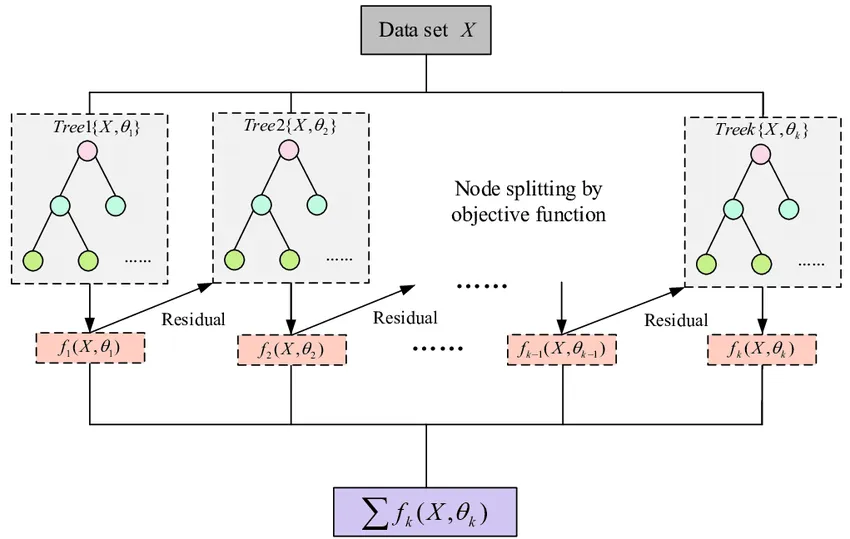

This is how XGBoost corrects its error through residuals and passes to the next model.
resources:https://medium.com/@fraidoonomarzai99/xgboost-regression-in-depth-cb2b3f623281  https://youtu.be/w-_vmVfpssg?si=-OgrNY3SSE-oi1eO

# **End of Task**

> ©DJS Synapse 2024 - 2025